In [3]:
import sklearn
import sklearn.datasets
import sklearn.metrics
%matplotlib inline
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [7]:
print(sklearn.__version__)

1.5.2


In [8]:
iris = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
print(iris.__class__)

<class 'tuple'>


In [12]:
print (iris[0])
print (iris[1])

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [13]:
# features DataFrame called X_iris
X_iris = iris[0]
X_iris = X_iris.rename(columns={"sepal length (cm)": "sepal_length", 
"sepal width (cm)": "sepal_width", 
"petal length (cm)": "petal_length",
"petal width (cm)": "petal_width"
})
# target DataFrame called y_iris
y_iris = iris[1]

In [14]:
# explore the features dataframe
print(X_iris.__class__)
print("Number of samples:{}".format(X_iris.shape[0]))
print("Number of features:{}".format(X_iris.shape[1]))
print(X_iris.head())

<class 'pandas.core.frame.DataFrame'>
Number of samples:150
Number of features:4
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [15]:
# explore the target dataframe
print(y_iris.__class__)
print(y_iris.head())

<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


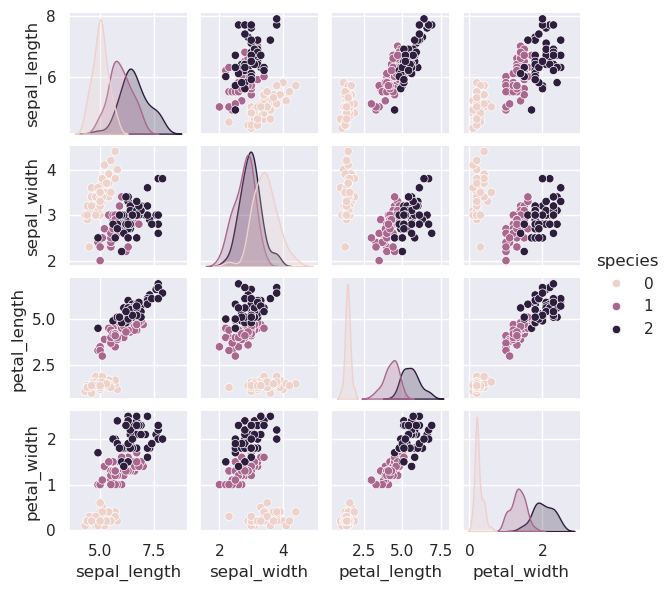

In [18]:
# will combine X and y into a DataFrame before plotting
iris_Xy = X_iris.assign(species = y_iris)
print(iris_Xy.columns)
sns.pairplot(iris_Xy, hue='species', height=1.5)

Data manipulation

In [22]:
X_iris = iris_Xy.drop('species', axis=1)
X_iris.shape
y_iris = iris_Xy['species']
y_iris.shape

(150,)

Supervised learning: linear regression

<Axes: xlabel='sepal_length', ylabel='petal_length'>

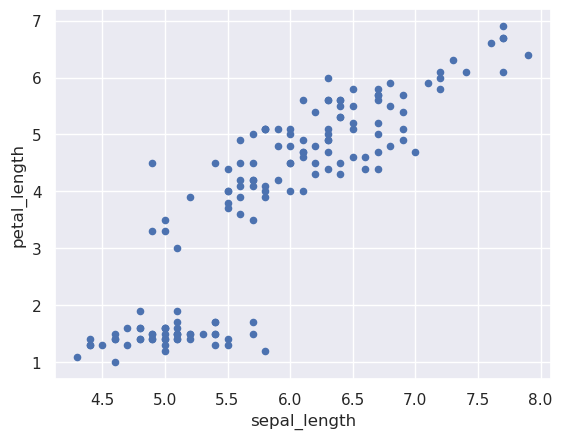

In [23]:
X_iris.plot.scatter(x='sepal_length',y='petal_length')

In [24]:
x = X_iris.sepal_length
y = X_iris.petal_length

In [26]:
model = LinearRegression()
model

LinearRegression()

In [27]:
# Arrange data into a features matrix and target vector
print("Shape of the original x object: {}".format(x.shape))
X = x.to_numpy()[:, np.newaxis]
print("Shape of the X object: {}".format(X.shape))

Shape of the original x object: (150,)
Shape of the X object: (150, 1)


In [32]:
model.fit(X, y)

LinearRegression()

In [37]:
print("Coef: {}".format(model.coef_))
print("Slope: {}".format(model.intercept_))
print("Formula: petal_length = {} * sepal_length + {}".format(np.round(model.coef_[0],2), np.round(model.intercept_, 2)))

Coef: [1.85843298]
Slope: -7.101443369602455
Formula: petal_length = 1.86 * sepal_length + -7.1


In [38]:
y_pred = model.predict(X)
print("The R^2 of this model is: {}".format(sklearn.metrics.r2_score(y, y_pred)))

The R^2 of this model is: 0.759954645772515


Predict labels for unknown data

In [40]:
xfit = np.arange(4.5, 8, 0.5)

In [41]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

In [45]:
print (yfit)


[1.26150503 2.19072152 3.11993801 4.0491545  4.97837099 5.90758748
 6.83680397]


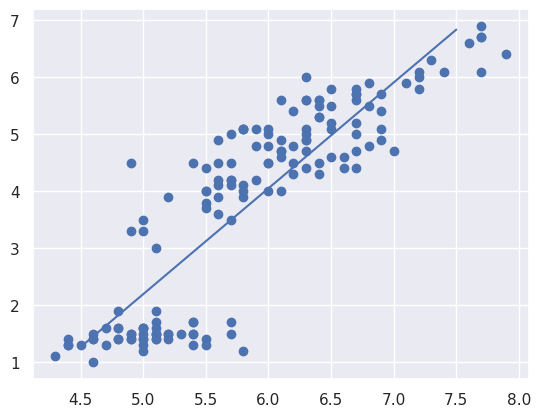

In [46]:
plt.scatter(x, y)
plt.plot(xfit, yfit)